# Garima Sharma Task_1 : Prediction using Supervised ML

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [30]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


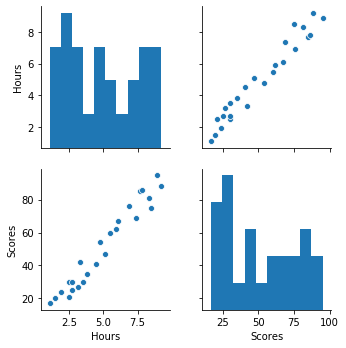

In [4]:
# # Visualisation of Numerical variables

sns.pairplot(df)
plt.show()

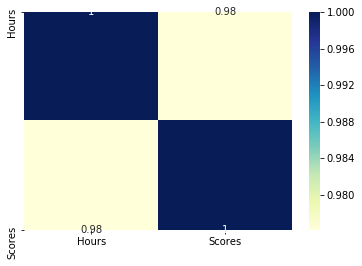

In [5]:
# Let's check the correlation coefficients to see which variables are highly correlated

#plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

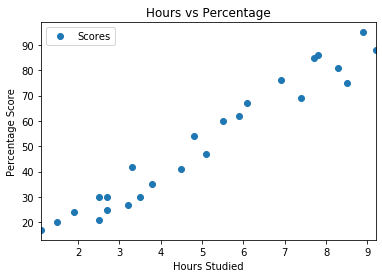

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
#From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Step 2: Preparing data for modelling

# Training the model

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

# Divide the data into train and test data set

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Visualising the Test set

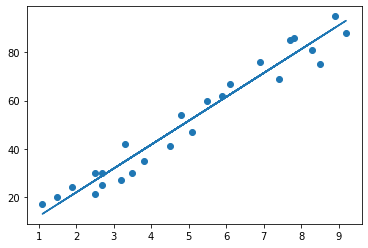

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predictions

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [20]:

y_test

array([20, 27, 69, 30, 62], dtype=int64)

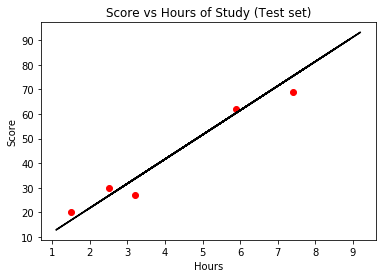

In [21]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Score vs Hours of Study (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [22]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[16.88414476 20.        ]
 [33.73226078 27.        ]
 [75.357018   69.        ]
 [26.79480124 30.        ]
 [60.49103328 62.        ]]


In [23]:
from sklearn.metrics import mean_absolute_error,r2_score
r2_s =r2_score(y_test, y_pred)
m = mean_absolute_error(y_test, y_pred)

In [24]:
m

4.183859899002975

In [25]:

r2_s

0.9454906892105356

# r2 score the 94% which mean 94% model fit the data

In [27]:
# What will be the predicted score if a student study for 9.25 hrs in a day

In [28]:
p_score = regressor.predict([[9.25]])
p_score


array([93.69173249])

In [ ]:
Predicted score is 93.69